In [1]:
#get the data from
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2021-11-06 13:55:31--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2021-11-06 13:55:32--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e92354ece22973300ca72eafc.dl.dropboxusercontent.com/cd/0/inline/BZczzxy8GnKo56E-pw33bZYvoArzBJCAoMd8ueee2iSkJGxpv6V-peHeg84aBOsZgDNGGhQ6nCMDJ7zF4j8FjF7WDVjAM6OhvC9W0HUoKZkDuoydXy0MPNVAT3e9fgQ6TpbCAp-YagZDaiU_boUjvCxV/file# [following]
--2021-11-06 13:55:32--  https://uc3e92354ece22973300ca72eafc.dl.dropboxusercontent.com/cd/0/inline/BZczzxy8GnKo56E-pw33bZYvoArzBJCAoMd8ueee2iSkJGxpv6V-peHeg84aBOsZgDNGGhQ6nCMDJ7zF4j8FjF7WDVjAM6

In [3]:
#unzip the data 
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [6]:
#Building our Model To train the data

In [7]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [8]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )


In [9]:
#Preparing our data using data generator

In [10]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [13]:
val_datagen = ImageDataGenerator(rescale = 1./255 )
val_data = val_datagen.flow_from_directory(directory= "/content/train", 
                                           target_size=(224,224), 
                                           batch_size=32,
)
train_data.class_indices


Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [14]:
#Visualizaing the data that is fed to train data gen

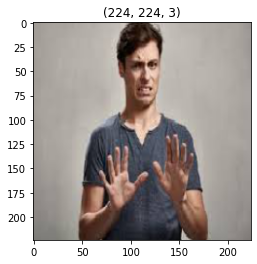

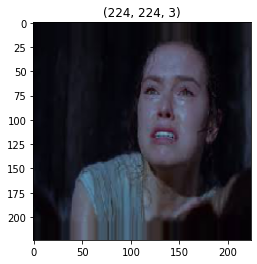

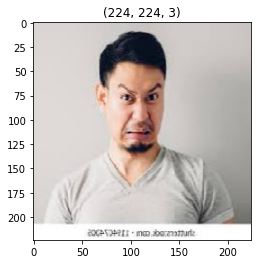

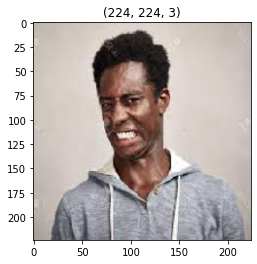

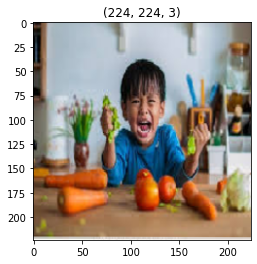

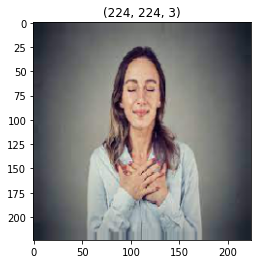

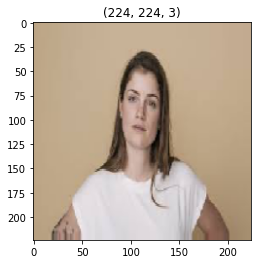

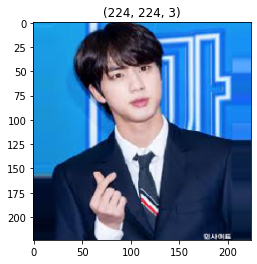

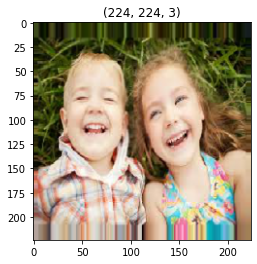

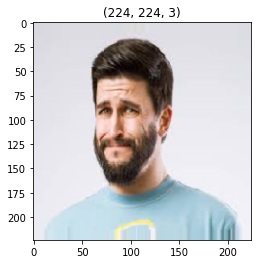

In [15]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)


In [16]:
#Having early stopping and model check point

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [18]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 24s 2s/step - loss: 14.2420 - accuracy: 0.2044 - val_loss: 7.2825 - val_accuracy: 0.3594

Epoch 00001: val_accuracy improved from -inf to 0.35938, saving model to best_model.h5
Epoch 2/30
10/10 [==============================] - 22s 2s/step - loss: 4.8047 - accuracy: 0.5126 - val_loss: 2.1014 - val_accuracy: 0.6797

Epoch 00002: val_accuracy improved from 0.35938 to 0.67969, saving model to best_model.h5
Epoch 3/30
10/10 [==============================] - 22s 2s/step - loss: 2.2716 - accuracy: 0.6981 - val_loss: 1.6956 - val_accuracy: 0.7422

Epoch 00003: val_accuracy improved from 0.67969 to 0.74219, saving model to best_model.h5
Epoch 4/30
10/10 [==============================] - 22s 2s/step - loss: 1.5260 - accuracy: 0.7673 - val_loss: 0.6037 - val_accuracy: 0.8672

Epoch 00004: val_accuracy improved from 0.74219 to 0.86719, saving model to best_model.h5
Epoch 5/30
10/10 [==============================] - 22s 2s/step - loss: 0.6514

In [19]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [20]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

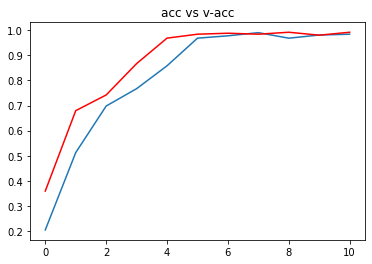

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

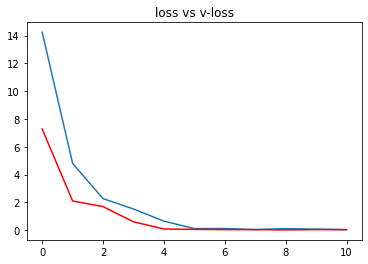

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [23]:

# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

 The image is of Happy


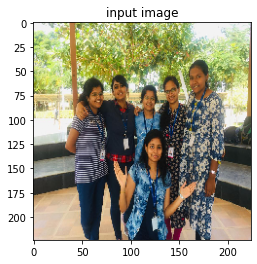

In [28]:

# path for the image to see if it predics correct class

path = "/content/WhatsApp Image 2021-11-06 at 7.57.42 PM.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" The image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()